In [19]:
# numerical module
import numpy as np

#setup plotting 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('./style/SciencePlots-APS.mplstyle')

In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


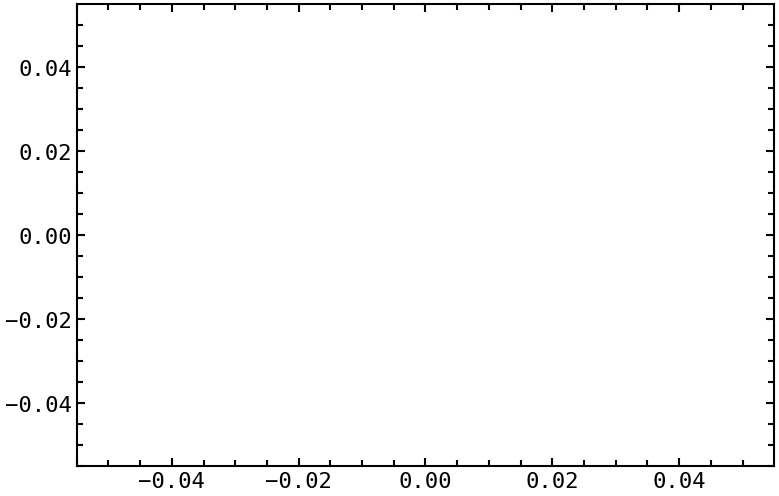

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 20

plt.figure(figsize=[9,6])

plt.plot()
plt.show()

## Plot density-of-states (DOS)

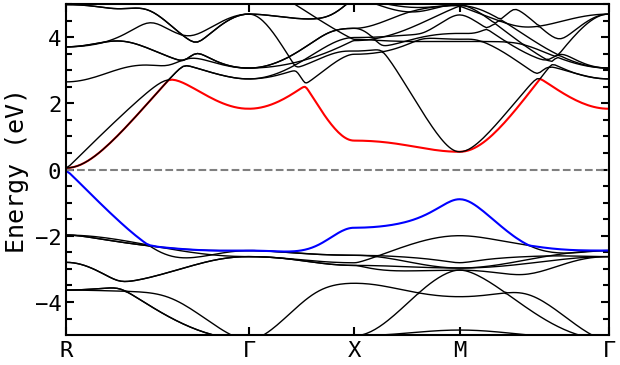

In [30]:
# module to load bandstructure data
def read_band(fname, EFermi):
    band_pw = np.loadtxt(fname)
    EF = EFermi
    kDist = np.unique(band_pw[:, 0])
    BandsPW = (np.reshape(band_pw[:, 1], (-1, len(kDist))).T) - EF
    return kDist, BandsPW

# load bandstructure
kDist, Band = read_band('data/CsSnI3.bands.gnu', EFermi=4.7016)
# high-symmetry point from prefix.band.out
kNode = np.array([0.0, 0.866, 1.366, 1.866, 2.5731])
# label of high-symmetry
kLabel = (r'R', r'$\Gamma$', r'X', r'M', r'$\Gamma$')

# plotting
fig, axE = plt.subplots(1)

#------------------------#
# plot bandstructure
#------------------------#
for i in range(0, Band.shape[1]):
    NumOccupied = 21   # 22th bands
    clr = 'black'
    lwmod = 1
    if i == NumOccupied :
        clr = 'blue'
        lwmod = 1.5
    if i == NumOccupied + 1 :
        clr = 'red' 
        lwmod = 1.5
    axE.plot(kDist, Band[:, i], color=clr, lw=lwmod)
# X-axis
axE.set_xlim(kNode[0], kNode[-1])
axE.set_xticks(kNode)
axE.set_xticklabels(kLabel)
axE.tick_params(axis='x', which='minor', bottom=False, top=False)
# Y-axis
axE.set_ylabel('Energy (eV)')
axE.set_ylim(-5.0, 5.0)
axE.axhline(0, color='gray', ls='--', lw=1.5)

# save figure
fig.savefig('./Bandstructure-CsSnI3.png', dpi=600)
plt.show()

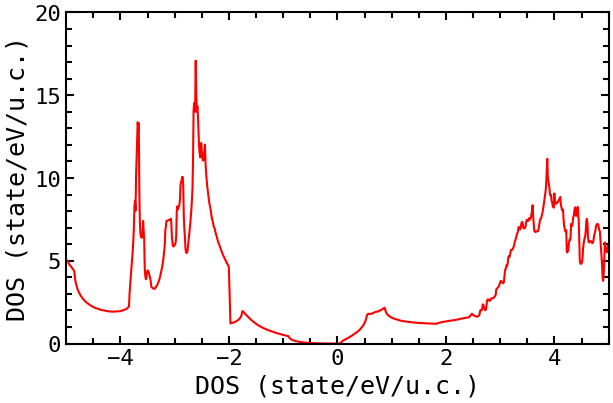

In [31]:
# module to load dos data
def read_dos(fname, EFermi):
    En, dos, idos = np.loadtxt(fname, unpack=True)
    En -= EFermi
    return En, dos

# load dos
Eneg, Dos = read_dos('data/CsSnI3.dos', EFermi=4.7016)

#------------------------#
# plot density-of states
#------------------------#
plt.figure()
plt.plot(Eneg, Dos, color='red', lw=1.5)
# X-axis
plt.xlabel('DOS (state/eV/u.c.)')
plt.ylim(0, 20)
# Y-axis
plt.ylabel('DOS (state/eV/u.c.)')
plt.xlim(-5.0, 5.0)

# save figure
fig.savefig('./DOS-CsSnI3.png', dpi=600)
plt.show()

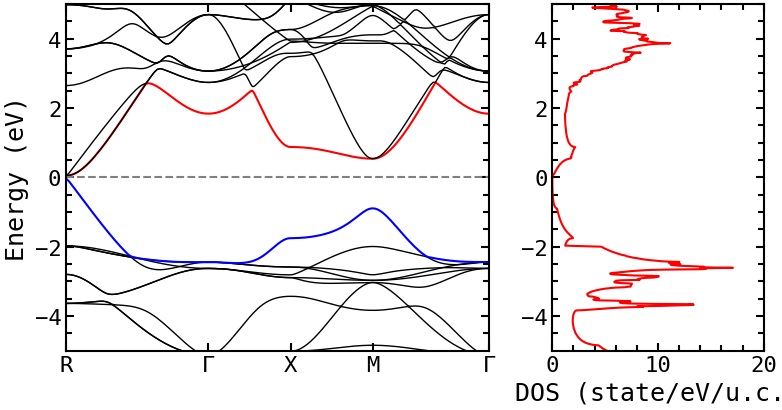

In [32]:
# module to load bandstructure data
def read_band(fname, EFermi):
    band_pw = np.loadtxt(fname)
    EF = EFermi
    kDist = np.unique(band_pw[:, 0])
    BandsPW = (np.reshape(band_pw[:, 1], (-1, len(kDist))).T) - EF
    return kDist, BandsPW
# module to load dos data
def read_dos(fname, EFermi):
    En, dos, idos = np.loadtxt(fname, unpack=True)
    En -= EFermi
    return En, dos

# load bandstructure
kDist, Band = read_band('data/CsSnI3.bands.gnu', EFermi=4.7016)
# high-symmetry point from prefix.band.out
kNode = np.array([0.0, 0.866, 1.366, 1.866, 2.5731])
# label of high-symmetry
kLabel = (r'R', r'$\Gamma$', r'X', r'M', r'$\Gamma$')

# load dos
Eneg, Dos = read_dos('data/CsSnI3.dos', EFermi=4.7016)

# plotting
fig = plt.figure(figsize=(9, 4.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[6, 3]) 

axE = plt.subplot(gs[0])
axD = plt.subplot(gs[1])

#------------------------#
# plot bandstructure
#------------------------#
for i in range(0, Band.shape[1]):
    NumOccupied = 21   # 22th bands
    clr = 'black'
    lwmod = 1
    if i == NumOccupied :
        clr = 'blue'
        lwmod = 1.5
    if i == NumOccupied + 1 :
        clr = 'red' 
        lwmod = 1.5
    axE.plot(kDist, Band[:, i], color=clr, lw=lwmod)
# X-axis
axE.set_xlim(kNode[0], kNode[-1])
axE.set_xticks(kNode)
axE.set_xticklabels(kLabel)
axE.tick_params(axis='x', which='minor', bottom=False, top=False)
# Y-axis
axE.set_ylabel('Energy (eV)')
axE.set_ylim(-5.0, 5.0)
axE.axhline(0, color='gray', ls='--', lw=1.5)

#------------------------#
# plot density-of states
#------------------------#
axD.plot(Dos, Eneg, color='red', lw=1.5)
# X-axis
axD.set_xlabel('DOS (state/eV/u.c.)')
axD.set_xlim(0, 20)
# Y-axis
axD.set_ylim(-5.0, 5.0)

# save figure
fig.savefig('./dispersion-relation-CsSnI3.png', dpi=600)
plt.show()

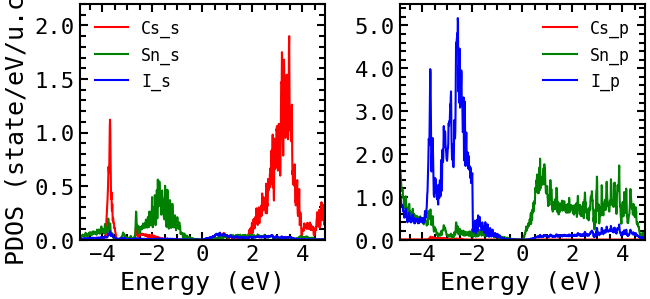

In [33]:
# The Fermi energy, find it in scf.out
EFermi = 4.7016

# module to load pdos data
def read_pdos(fname, EFermi):
    ener, pdos = np.loadtxt(fname, usecols=(0,1), unpack=True)
    ener -= EFermi
    return ener, pdos

# read pdos data
    ## for s-orbital each atoms
    ## Cs
EnCs_s, pdosCs_s = read_pdos('data/CsSnI3.pdos_atm#1(Cs)_wfc#2(s)', EFermi) 
    ## Sn
EnSn_s, pdosSn_s = read_pdos('data/CsSnI3.pdos_atm#2(Sn)_wfc#1(s)', EFermi)
    ## I
EnI_s, pdosI_s = read_pdos('data/CsSnI3.pdos_atm#3(I)_wfc#1(s)', EFermi)

    ## for p-orbital each atoms
    ## Cs
EnCs_p, pdosCs_p = read_pdos('data/CsSnI3.pdos_atm#1(Cs)_wfc#3(p)', EFermi)
    ## Sn
EnSn_p, pdosSn_p = read_pdos('data/CsSnI3.pdos_atm#2(Sn)_wfc#2(p)', EFermi)
    ## I
EnI_p, pdosI_p = read_pdos('data/CsSnI3.pdos_atm#3(I)_wfc#2(p)', EFermi)

# plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5))

#------------------------#
# s-orbital
#------------------------#
axes[0].plot(EnCs_s, pdosCs_s, 'r-', lw=1.5, label='Cs_s')
axes[0].plot(EnSn_s, pdosSn_s, 'g-', lw=1.5, label='Sn_s')
axes[0].plot(EnI_s, pdosI_s, 'b-', lw=1.5, label='I_s')
# X-axis
axes[0].set_xlabel('Energy (eV)')
axes[0].set_xlim(-4.9, 4.9)
axes[0].set_xticks([-4.0, -2.0, 0., 2., 4.])
# Y-axis
axes[0].set_ylabel('PDOS (state/eV/u.c)')
axes[0].set_ylim(0., 2.2)
axes[0].set_yticks([0.0, 0.5, 1.0, 1.5, 2.0])

axes[0].legend(loc='best', prop={'size': 12})

#------------------------#
# p-orbital
#------------------------#
axes[1].plot(EnCs_p, pdosCs_p, 'r-', lw=1.5, label='Cs_p')
axes[1].plot(EnSn_p, pdosSn_p, 'g-', lw=1.5, label='Sn_p')
axes[1].plot(EnI_p, pdosI_p, 'b-', lw=1.5, label='I_p')
# X-axis
axes[1].set_xlabel('Energy (eV)')
axes[1].set_xlim(-4.9, 4.9)
axes[1].set_xticks([-4.0, -2.0, 0., 2., 4.])
# Y-axis
axes[1].set_ylim(0., 5.5)
axes[1].set_yticks([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
axes[1].set_yticklabels(['0.0', '1.0', '2.0', '3.0', '4.0', '5.0'])
axes[1].legend(loc='best', prop={'size': 12})

plt.tight_layout()
# save figure
fig.savefig('./pdos-CsSnI3.png', dpi=600)
plt.show()


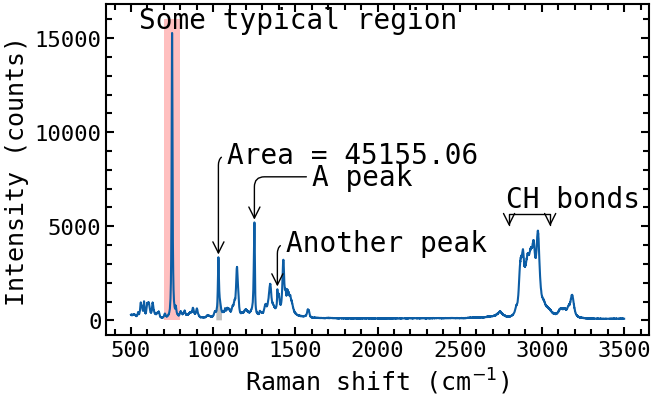

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Load data (fill it with read raman data in the folder /data/ with unpack=True)
w, i = np.loadtxt('data/raman.txt', unpack=True)

# Plot data
plt.plot(w, i)
plt.xlabel('Raman shift (cm$^{-1}$)')
plt.ylabel('Intensity (counts)')

# Create a new figure and axes instance
ax = plt.gca()

# Shade and annotate a red rectangle over a typical region
ax.annotate('Some typical region', xy=(550, 15500), xycoords='data')
ax.fill_between([700, 800], 0, [16000, 16000], facecolor='red', alpha=0.25)

# Shade a specific region in the spectrum and annotate its area
ind = (w > 1019) & (w < 1054)
ax.fill_between(w[ind], 0, i[ind], facecolor='gray', alpha=0.5)
area = np.trapz(i[ind], w[ind])
x, y = w[ind][np.argmax(i[ind])], i[ind][np.argmax(i[ind])]
ax.annotate(f'Area = {area:.2f}', xy=(x, y),
            xycoords='data',
            xytext=(x + 50, y + 5000),
            textcoords='data',
            arrowprops=dict(arrowstyle="->", 
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# Annotate a peak in the 1250-1252 range
ind = (w > 1250) & (w < 1252)
x, y = w[ind][np.argmax(i[ind])], i[ind][np.argmax(i[ind])]
ax.annotate('A peak', xy=(x, y),
            xycoords='data',
            xytext=(x + 350, y + 2000),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# Annotate another peak in the 1380-1400 range
ind = (w > 1380) & (w < 1400)
x, y = w[ind][np.argmax(i[ind])], i[ind][np.argmax(i[ind])]
ax.annotate('Another peak', xy=(x, y),
            xycoords='data',
            xytext=(x + 50, y + 2000),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# Indicate a region with connected arrows
ax.annotate('CH bonds', xy=(2780, 6000), xycoords='data')
ax.annotate('', xy=(2800., 5000.), xycoords='data',
            xytext=(3050, 5000), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="bar",
                            ec="k",
                            shrinkA=0.1, shrinkB=0.1))

plt.savefig('./RamanGraph.png')
plt.show()